In [1]:
import os
from pathlib import Path
import numpy as np
import radai
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load a ListmodeH5 dataset

The data set initialization will check the h5 structure and attributes to make sure it follows the `ListmodeH5Schema` in `radai.data`. The `deep_validation` option allows the user to check only the first run to accelerate loading once the dataset is known to be valid.

Currently this example set is located in a private drive. Contact the maintainers for access.

In [2]:
DATA = Path(os.environ["RADAI_DATA"])
h5path = DATA / "Memoryless/source_data_v1.h5"
data = radai.data.ListmodeH5(h5path, deep_validation=True)

# Accessing the h5file

### The h5 file is loaded in read only mode.

In [3]:
data.h5file

<HDF5 file "source_data_v1.h5" (mode r)>

### The run groups can be accessed:

In [4]:
data.get_run_group(0)

<HDF5 group "/runs/run0" (5 members)>

# Accessing the metadata

### Global

In [5]:
data.get_metadata()

{'background_ids': array([0, 1, 2, 3, 4, 5, 6]),
 'background_names': array(['Src', 'K-40', 'U', 'Th', 'Cs137_Soil', 'Pb-214', 'Bi-214'],
       dtype=object),
 'format': 7,
 'source_ids': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 'source_names': array(['BKG', 'K-40', 'Co-57', 'Co-60', 'Cs-137', 'Ba-133',
        'Ir-192_point', 'Ra-226', 'Th-232', 'Am-241', 'F-18', 'Tc-99m',
        'I-131', 'Tl-201', 'NatU-2.5kg', 'NatU-10kg', 'NatU-25kg',
        'RefinedU-2.5kg', 'RefinedU-10kg', 'RefinedU-25kg', 'LEU-2.5kg',
        'LEU-10kg', 'LEU-25kg', 'HEU-2.5kg', 'HEU-10kg', 'HEU-25kg',
        'FGPu-2.5kg', 'FGPu-10kg', 'FGPu-25kg', 'WGPu-2.5kg', 'WGPu-10kg',
        'WGPu-25kg', 'Cu-67', 'Sr-90', 'Ir-192_industrial'], dtype=object),
 'source_shielding_ids': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'source_shielding_names': array(['None', '0.025cm_steel', '1cm_steel', '2cm_st

### For a particular run

In [6]:
data.get_metadata(0)

{'end_timestamp': 3633.204365, 'seed': 106370047, 'start_timestamp': 0.0}

# Source locations ☢️

The source locations are provided with the `SourceLocations` class

In [7]:
data.get_source_locations(run_id=0)

SourceLocations({'name': {3: 'FGPu-10kg', 4: 'FGPu-25kg', 0: 'HEU-10kg', 1: 'HEU-25kg', 6: 'FGPu-10kg', 2: 'FGPu-2.5kg', 5: 'FGPu-2.5kg'}, 'time': {3: 20159, 4: 47636, 0: 131662, 1: 553524, 6: 2415615, 2: 2421530, 5: 2588815}, 'distance': {3: 152.39593505859375, 4: 411.7845458984375, 0: 664.4536743164062, 1: 1808.8349609375, 6: 13011.90625, 2: 13044.3671875, 5: 13913.65625}, 'location': {3: None, 4: None, 0: None, 1: None, 6: None, 2: None, 5: None}, 'shielding': {3: None, 4: None, 0: None, 1: None, 6: None, 2: None, 5: None}, 'standoffs': {3: -106.68000030517578, 4: -176.78399658203125, 0: -146.45640563964844, 1: -137.16000366210938, 6: -170.68800354003906, 2: -137.16000366210938, 5: -140.20799255371094}, 'snr_peak': {3: 7.279983997344971, 4: 27.694278717041016, 0: 1.9841690063476562, 1: 0.055227212607860565, 6: 3.760390043258667, 2: 27.941539764404297, 5: 0.6287946701049805}, 'snr_integral': {3: 30.076610565185547, 4: 39.07552719116211, 0: 1.2717136144638062, 1: 0.12600688636302948, 

### A dataframe (for all the runs) is a bit easier to read ... 😅

In [8]:
data.get_source_locations_dataframe()

name      distance location shielding   standoffs  \
run_id time                                                               
0      20159     FGPu-10kg    152.395935     None      None -106.680000   
       47636     FGPu-25kg    411.784546     None      None -176.783997   
       131662     HEU-10kg    664.453674     None      None -146.456406   
       553524     HEU-25kg   1808.834961     None      None -137.160004   
       2415615   FGPu-10kg  13011.906250     None      None -170.688004   
...                    ...           ...      ...       ...         ...   
65     1950735   FGPu-25kg  11212.977539     None      None  141.731995   
       2421619  WGPu-2.5kg  14333.974609     None      None  121.919998   
       2434757   WGPu-25kg  14473.420898     None      None  182.880005   
       3123185   WGPu-25kg  18667.478516     None      None  159.715195   
       3367551   WGPu-10kg  19616.914062     None      None  199.643997   

                  snr_peak  snr_integral       label  
run_id time                                           
0      20159      7.279984     30.076611   FGPu-10kg  
       47636     27.694279     39.075527   FGPu-25kg  
       131662     1.984169      1.271714    HEU-10kg  
       553524     0.055227      0.126007    HEU-25kg  
       2415615    3.760390      3.106891   FGPu-10kg  
...                    ...           ...         ...  
65     1950735    6.863246      8.386229   FGPu-25kg  
       2421619    2.340147      5.522917  WGPu-2.5kg  
       2434757    0.532272      1.066041   WGPu-25kg  
       3123185  129.676956    331.122955   WGPu-25kg  
       3367551    2.295944      5.503938   WGPu-10kg  

[352 rows x 8 columns]

### The source locations can also be plotted

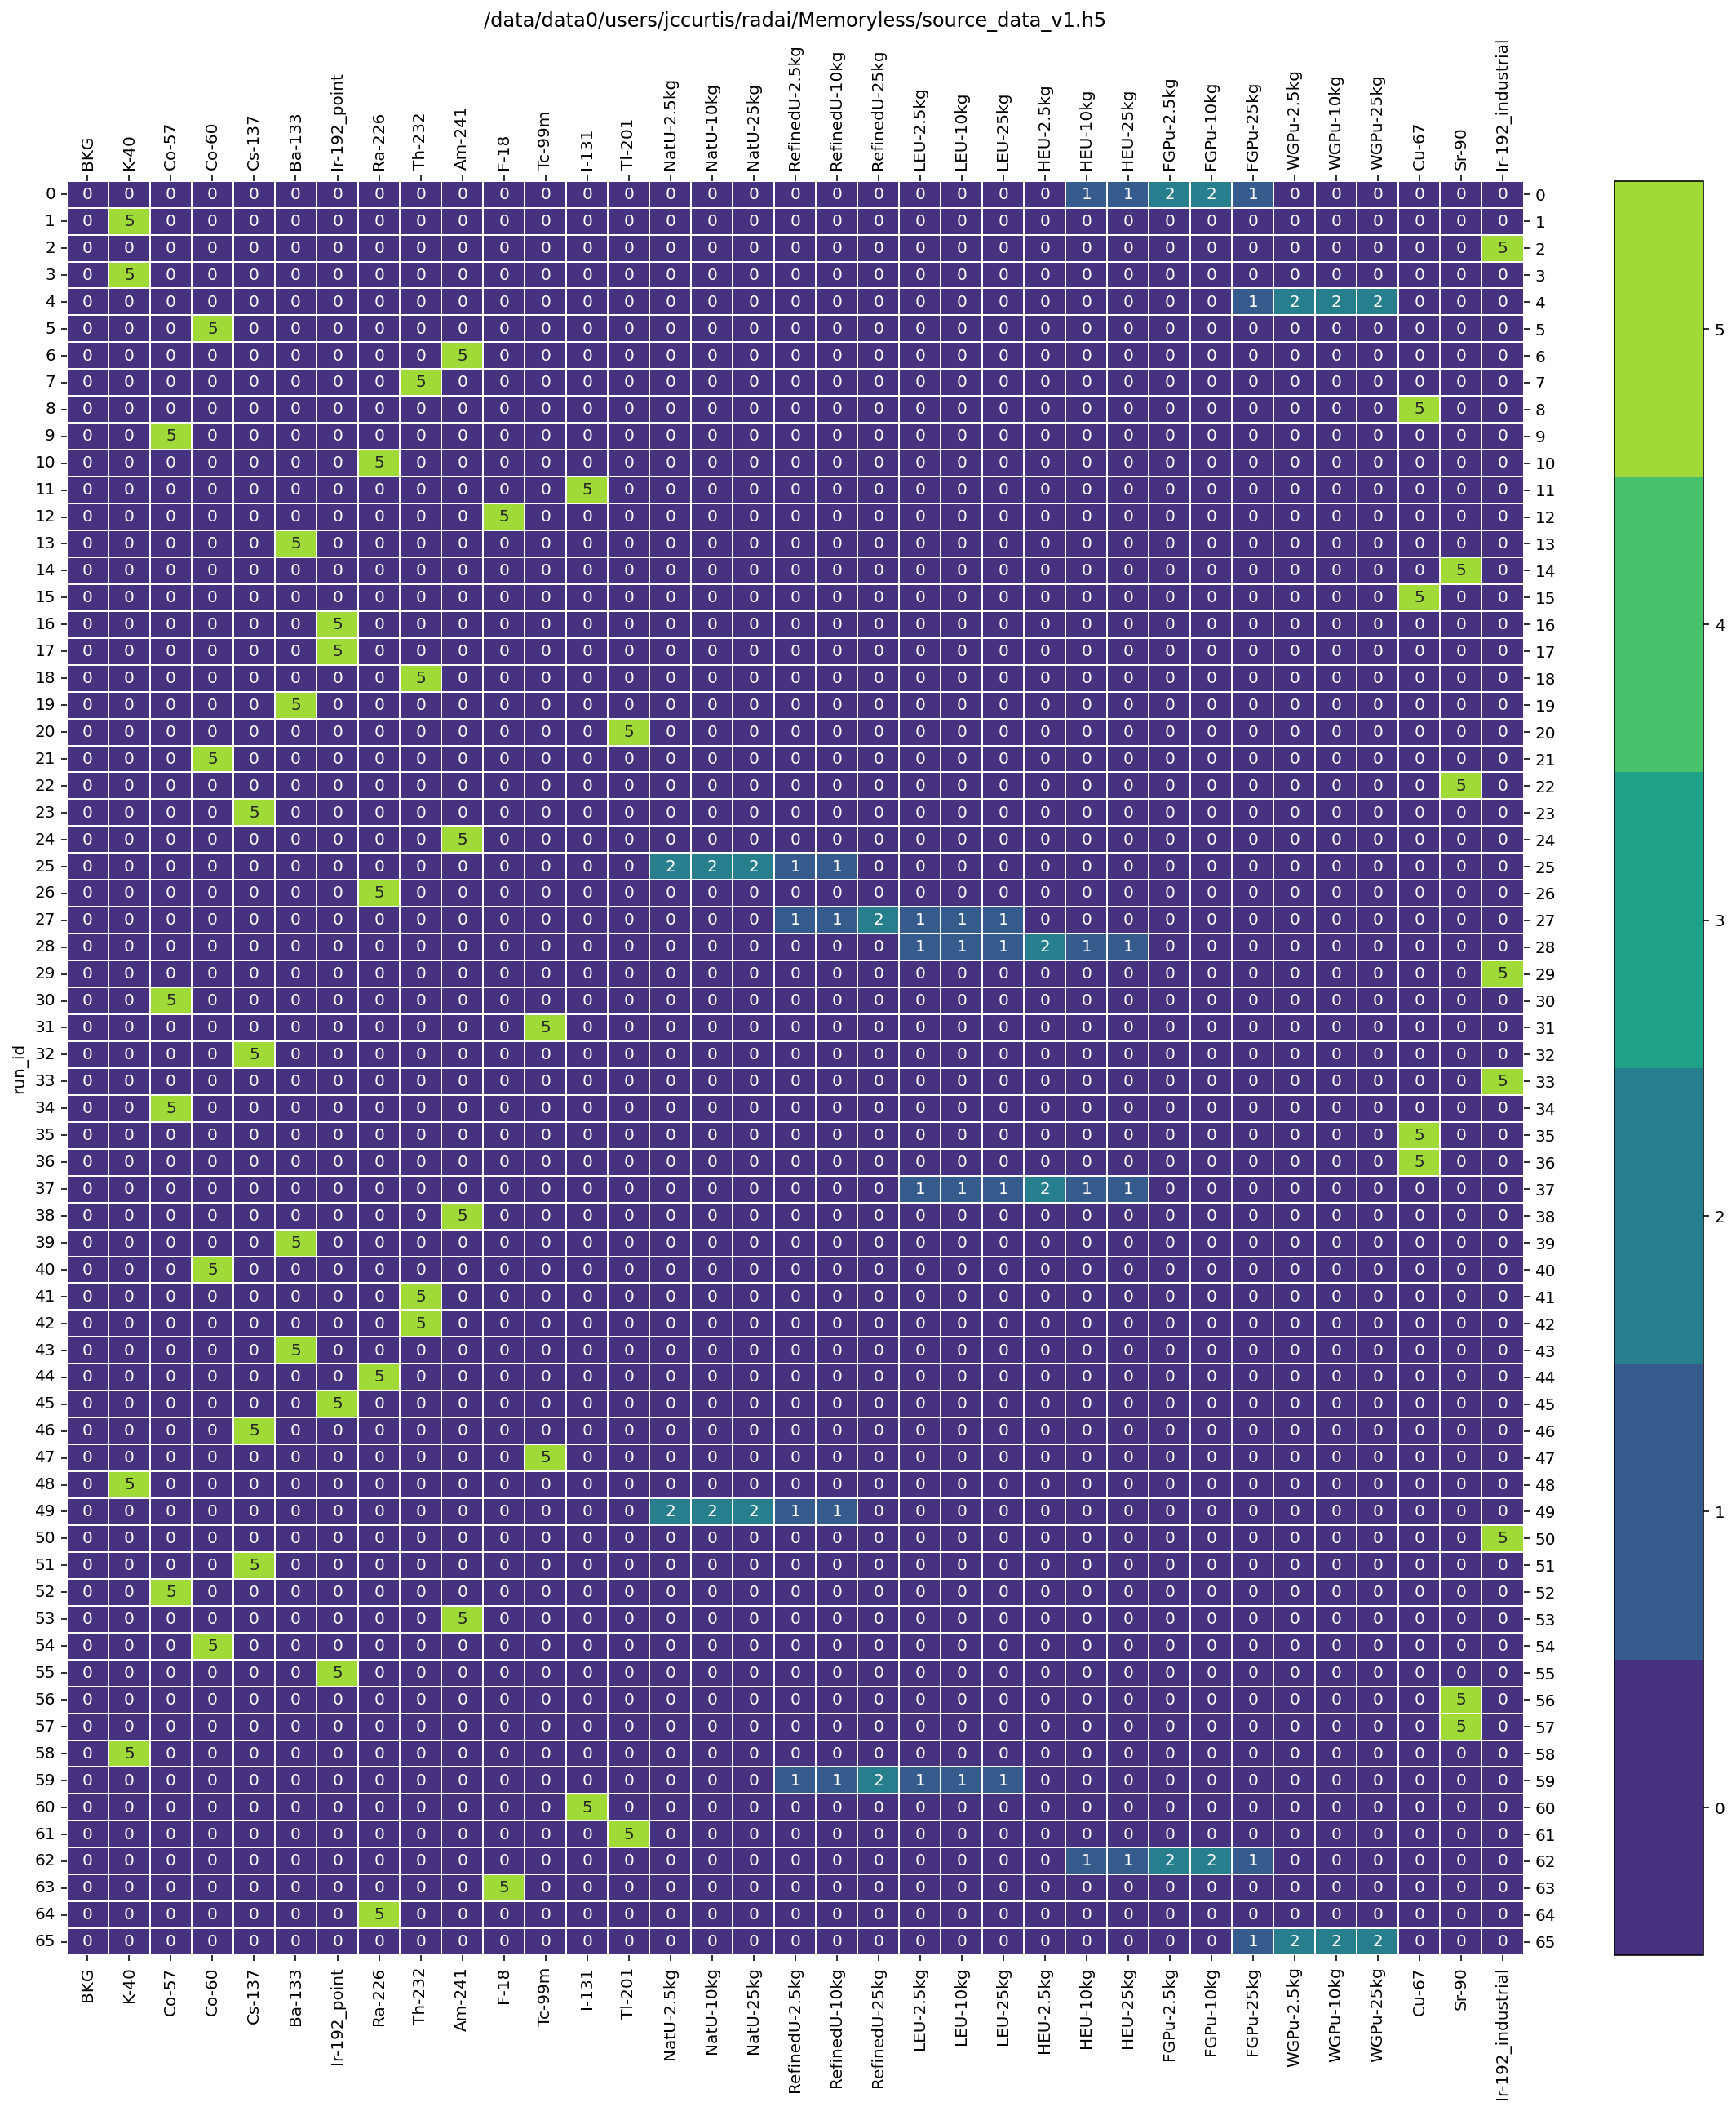

In [9]:
data.plot_num_label_per_run_heatmap()

# Source ids and names 🧐

The source id, names and labels are provided with the `LabelManager` class. Background is **ALWAYS** `id=0` thus the number of non-null sources is the last id (in this case `34`).

In [10]:
print(data.label_manager)

LabelManager(tier 0, 35 items, 35 labels)
    (0, 'BKG', 'BKG', 'unknown', True)
    (1, 'K-40', 'K-40', 'unknown', True)
    (2, 'Co-57', 'Co-57', 'unknown', True)
    (3, 'Co-60', 'Co-60', 'unknown', True)
    (4, 'Cs-137', 'Cs-137', 'unknown', True)
    (5, 'Ba-133', 'Ba-133', 'unknown', True)
    (6, 'Ir-192_point', 'Ir-192', 'unknown', True)
    (7, 'Ra-226', 'Ra-226', 'unknown', True)
    (8, 'Th-232', 'Th-232', 'unknown', True)
    (9, 'Am-241', 'Am-241', 'unknown', True)
    (10, 'F-18', 'F-18', 'unknown', True)
    (11, 'Tc-99m', 'Tc-99m', 'unknown', True)
    (12, 'I-131', 'I-131', 'unknown', True)
    (13, 'Tl-201', 'Tl-201', 'unknown', True)
    (14, 'NatU-2.5kg', 'NatU', 'unknown', True)
    (15, 'NatU-10kg', 'NatU', 'unknown', True)
    (16, 'NatU-25kg', 'NatU', 'unknown', True)
    (17, 'RefinedU-2.5kg', 'RefinedU', 'unknown', True)
    (18, 'RefinedU-10kg', 'RefinedU', 'unknown', True)
    (19, 'RefinedU-25kg', 'RefinedU', 'unknown', True)
    (20, 'LEU-2.5kg', 'LEU', '

### This information is just a dataframe underneath

In [11]:
data.label_manager.data.head()

name isotope category  enabled
id                                  
0      BKG     BKG  unknown     True
1     K-40    K-40  unknown     True
2    Co-57   Co-57  unknown     True
3    Co-60   Co-60  unknown     True
4   Cs-137  Cs-137  unknown     True

### Various converter methods are included (vectorized and works with integer types)

In [12]:
display(data.label_manager.id2name(34))
display(data.label_manager.id2isotope([34]))
display(data.label_manager.id2category(np.int16(34)))

'Ir-192_industrial'

array(['Ir-192'], dtype='<U8')

'unknown'

### The `LaberManager` also handles multiple tiers of labeling

* `tier=0`: raw source name
* `tier=1`: isotope (group)
* `tier=2`: category (group)

This is performed automatically when computing SNR and labeling in the data generation steps outlined below.

In [13]:
data.label_manager.tier = 0
display(data.label_manager.id2label(34))
data.label_manager.tier = 1
display(data.label_manager.id2label(34))

'Ir-192_industrial'

'Ir-192'

# Discretization Parameters

By default the following discretization values are used. These can be configured during or after construction.

In [14]:
data.discretization_summary

{'num_energy_bins': 128,
 'energy_bin_edges (keV)': array([0.00000000e+00, 1.83105469e-01, 7.32421875e-01, 1.64794922e+00,
        2.92968750e+00, 4.57763672e+00, 6.59179688e+00, 8.97216797e+00,
        1.17187500e+01, 1.48315430e+01, 1.83105469e+01, 2.21557617e+01,
        2.63671875e+01, 3.09448242e+01, 3.58886719e+01, 4.11987305e+01,
        4.68750000e+01, 5.29174805e+01, 5.93261719e+01, 6.61010742e+01,
        7.32421875e+01, 8.07495117e+01, 8.86230469e+01, 9.68627930e+01,
        1.05468750e+02, 1.14440918e+02, 1.23779297e+02, 1.33483887e+02,
        1.43554688e+02, 1.53991699e+02, 1.64794922e+02, 1.75964355e+02,
        1.87500000e+02, 1.99401855e+02, 2.11669922e+02, 2.24304199e+02,
        2.37304688e+02, 2.50671387e+02, 2.64404297e+02, 2.78503418e+02,
        2.92968750e+02, 3.07800293e+02, 3.22998047e+02, 3.38562012e+02,
        3.54492188e+02, 3.70788574e+02, 3.87451172e+02, 4.04479980e+02,
        4.21875000e+02, 4.39636230e+02, 4.57763672e+02, 4.76257324e+02,
        4.951

# Run information 🏃

In [15]:
data.run_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=uint32)

In [16]:
data.num_runs

66

In [17]:
for run_id in data.iter_run_ids(progress_bar=True):
    pass

Iterating runs:   0%|          | 0/66 [00:00<?, ?it/s]

# Rad data (listmode)

### Get the listmode arrays

In [18]:
help(data.get_listmode)

Help on method get_listmode in module radai.data.listmode_h5.data_set:

get_listmode(run_id: int, column: str, only_enabled: bool = True) -> numpy.ndarray method of radai.data.listmode_h5.data_set.ListmodeH5 instance
    Get a 1D array of a listmode data column
    
    Parameters
    ----------
    run_id : int
        Run ID to consider
    column : {"id", "source_id", "background_id", "dt", "energy", "time"}
        Name of data column:
            * id or source_id: source id (see enum in root attrs)
            * background_id: background id (see enum in root attrs)
            * label: label from label_manager.id2label(ids, as_string=False)
            * dt: µs between events
            * energy: keV of interactions
            * time: time since start in milliseconds of interactions
    only_enabled : bool, optional
        Include only the events from enabled source(s) (see the label_manager
        for more details). Note that setting this to False will raise an
        error

In [19]:
data.get_listmode(0, 'energy')

array([ 93.33081 , 501.82297 ,  82.27291 , ...,  48.297127, 741.09644 ,
       545.9626  ], dtype=float32)

### Get a listmode dataframe

In [20]:
data.get_listmode_df(0)

energy         time  source_id  background_id
0         93.330811        0.000          0              2
1        501.822968        0.118          0              2
2         82.272911        0.863          0              3
3        101.041092        0.974          0              2
4        735.655396        1.549          0              2
...             ...          ...        ...            ...
9826600  358.721069  3633201.559          0              3
9826601  185.489441  3633202.076          0              2
9826602   48.297127  3633202.179          0              2
9826603  741.096436  3633203.250          0              1
9826604  545.962585  3633204.069          0              2

[9826605 rows x 4 columns]

### Get all the spectra for a run

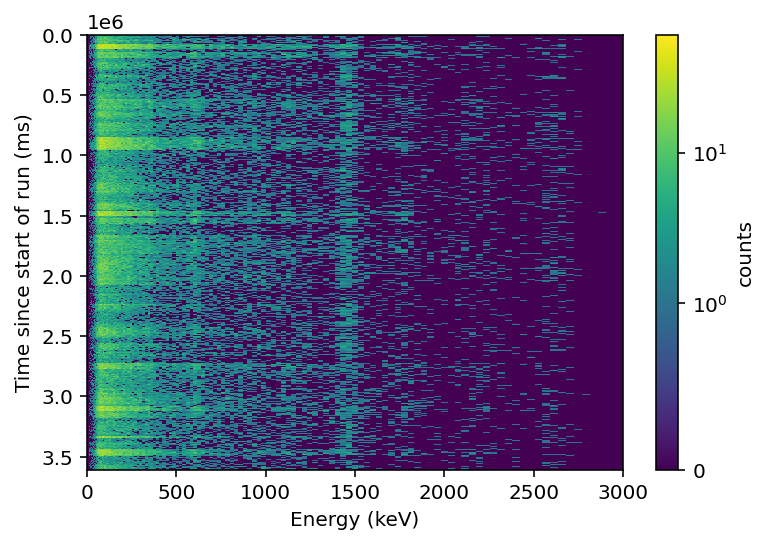

In [21]:
wfd = data.get_entire_waterfall(1)
print(wfd)
wfd.plot();

### Get all the spectra for a run but only the background counts

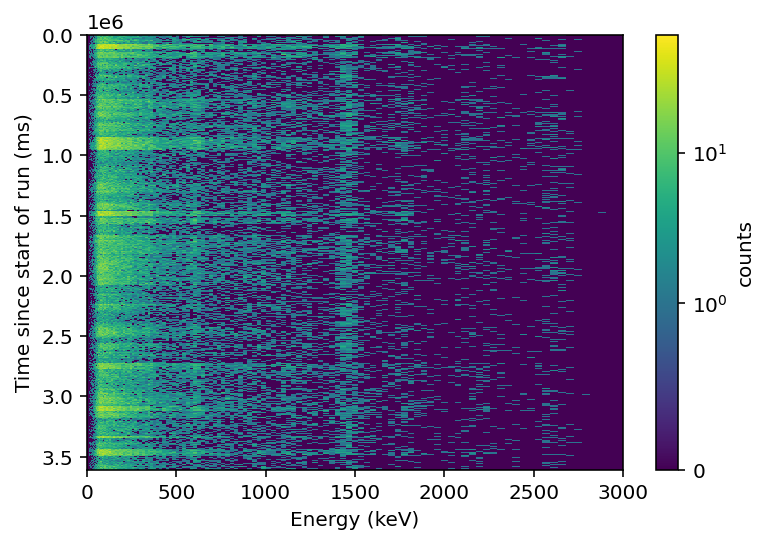

In [22]:
data.get_entire_waterfall(1, label="BKG").plot();

### Get all the spectra for a run but only the K-40 counts

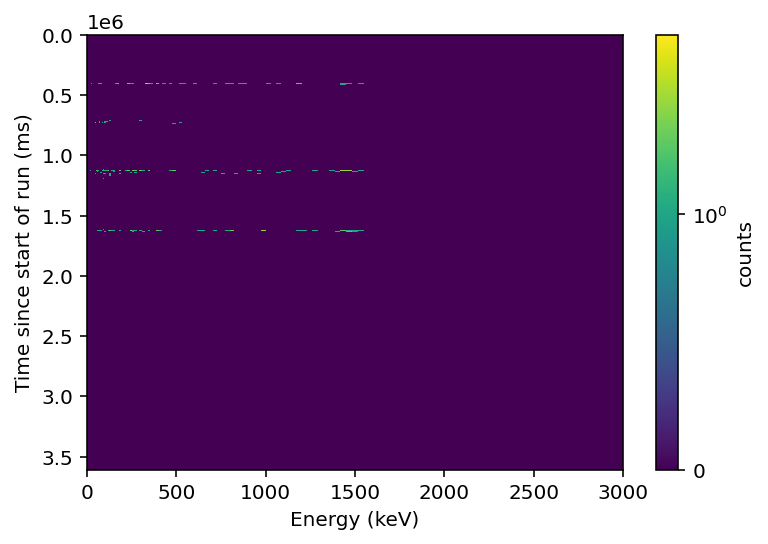

In [23]:
data.get_entire_waterfall(1, label="K-40").plot();

### Which are the only source labels in this run

In [24]:
np.all(
    data.get_entire_waterfall(1).data ==
    data.get_entire_waterfall(1, label="BKG").data + 
    data.get_entire_waterfall(1, label="K-40").data
)

True

# Rad data (binmode)

### Iter spectra

Iterate over the first 100 spectra. `indices` refer to the `(run_id, start_time_idx)` for spectra and waterfalls.

Iterating spectra:   0%|          | 0/100 [00:00<?, ?it/s]

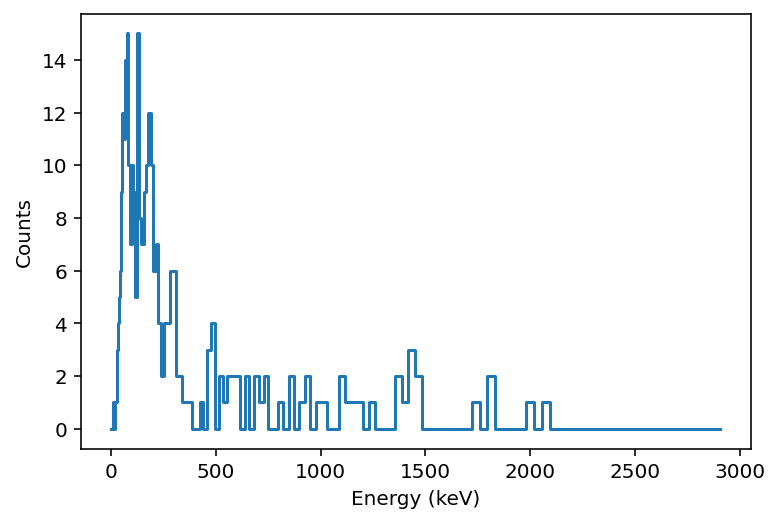

In [25]:
for s in data.iter_spectra(progress_bar=True, indices=[(0, x) for x in range(100)]):
    pass
s.plot();

### Iter waterfalls

Iterate over the first 100 waterfalls and plot the 100th one.

Iterating waterfalls:   0%|          | 0/100 [00:00<?, ?it/s]

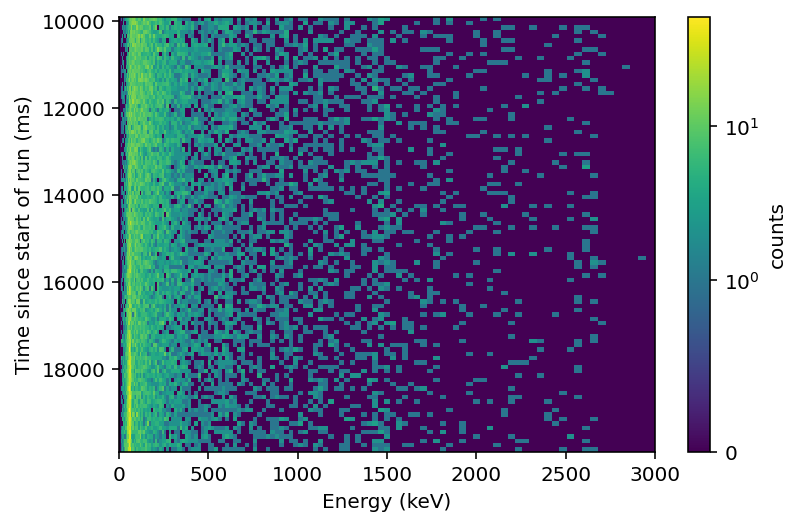

In [26]:
for w in data.iter_waterfalls(progress_bar=True, indices=[(0, x) for x in range(100)]):
    pass
w.plot();

### Iter batches of waterfalls

Iterate over the first 100 waterfalls in batches. The batch size by default is 32 so this will produce 3 batches and drop the last 4 waterfalls due to shape constraints. The batch size is controlled with `data.batch_size`.

In [27]:
for b in data.iter_batches(progress_bar=True, indices=[(0, x) for x in range(100)]):
    pass
b.data.shape

Iterating batches:   0%|          | 0/3 [00:00<?, ?it/s]

(32, 100, 128)

# Signal to Noise Calculations

The SNR on a per run basis can be calculated. **NOTE:** This SNR calculation uses the `get_listmode` method and therefore uses the correct data when augmentations are applied (see below).

In [28]:
help(data.get_snr_for_run)

Help on method get_snr_for_run in module radai.data.listmode_h5.data_set:

get_snr_for_run(run_id: int, method='s/sqrt(s+b)', energy_min=None, energy_max=None, include_all_labels: bool = False, index_by_time: bool = True, aggregate_for_waterfalls: bool = False, aggregation_method: str = 'max') -> pandas.core.frame.DataFrame method of radai.data.listmode_h5.data_set.ListmodeH5 instance
    Calculate SNR per label (including background) vs time for a run.
    
    The background column is defined to be equal to 0. It is included for
    unambiguous labeling downstream.
    
    Parameters
    ----------
    run_id : int
        Run ID to consider
    method : {"s/sqrt(b)", "s/sqrt(s+b)", "currie"}, optional
        Method to calculate SNR:
            * s/sqrt(b): from Aucott 2014
            * s/sqrt(s+b): from Nicholson 2020 (default)
            * currie: Not Implemented
    energy_min : float, optional
        Minimum energy considered, by default None (no bound).
    energy_max : fl

### The per run SNR results a dataframe

In [29]:
data.get_snr_for_run(0)

label        HEU     FGPu
time_center              
50.0         0.0  0.00000
150.0        0.0  0.06455
250.0        0.0  0.00000
350.0        0.0  0.00000
450.0        0.0  0.00000
...          ...      ...
3632750.0    0.0  0.00000
3632850.0    0.0  0.00000
3632950.0    0.0  0.00000
3633050.0    0.0  0.00000
3633150.0    0.0  0.00000

[36332 rows x 2 columns]

### Only the sources (labels) present are provided unless told otherwise

In [30]:
data.get_snr_for_run(0, include_all_labels=True).head()

label        BKG  K-40  Co-57  Co-60  Cs-137  Ba-133  Ir-192  Ra-226  Th-232  \
time_center                                                                    
50.0         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
150.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
250.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
350.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
450.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

label        Am-241  ...  I-131  Tl-201  NatU  RefinedU  LEU  HEU     FGPu  \
time_center          ...                                                     
50.0            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   
150.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.06455   
250.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   
350.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   
450.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   

label        WGPu  Cu-67  Sr-90  
time_center                      
50.0          0.0    0.0    0.0  
150.0         0.0    0.0    0.0  
250.0         0.0    0.0    0.0  
350.0         0.0    0.0    0.0  
450.0         0.0    0.0    0.0  

[5 rows x 22 columns]

### IMPORTANT: The SNR calculation operates on a label tier basis

In [31]:
data.label_manager.tier = 0
data.get_snr_for_run(0, include_all_labels=True).head()

label        BKG  K-40  Co-57  Co-60  Cs-137  Ba-133  Ir-192_point  Ra-226  \
time_center                                                                  
50.0         NaN   0.0    0.0    0.0     0.0     0.0           0.0     0.0   
150.0        NaN   0.0    0.0    0.0     0.0     0.0           0.0     0.0   
250.0        NaN   0.0    0.0    0.0     0.0     0.0           0.0     0.0   
350.0        NaN   0.0    0.0    0.0     0.0     0.0           0.0     0.0   
450.0        NaN   0.0    0.0    0.0     0.0     0.0           0.0     0.0   

label        Th-232  Am-241  ...  HEU-25kg  FGPu-2.5kg  FGPu-10kg  FGPu-25kg  \
time_center                  ...                                               
50.0            0.0     0.0  ...       0.0         0.0    0.00000        0.0   
150.0           0.0     0.0  ...       0.0         0.0    0.06455        0.0   
250.0           0.0     0.0  ...       0.0         0.0    0.00000        0.0   
350.0           0.0     0.0  ...       0.0         0.0    0.00000        0.0   
450.0           0.0     0.0  ...       0.0         0.0    0.00000        0.0   

label        WGPu-2.5kg  WGPu-10kg  WGPu-25kg  Cu-67  Sr-90  Ir-192_industrial  
time_center                                                                     
50.0                0.0        0.0        0.0    0.0    0.0                0.0  
150.0               0.0        0.0        0.0    0.0    0.0                0.0  
250.0               0.0        0.0        0.0    0.0    0.0                0.0  
350.0               0.0        0.0        0.0    0.0    0.0                0.0  
450.0               0.0        0.0        0.0    0.0    0.0                0.0  

[5 rows x 35 columns]

In [32]:
data.label_manager.tier = 1
data.get_snr_for_run(0, include_all_labels=True).head()

label        BKG  K-40  Co-57  Co-60  Cs-137  Ba-133  Ir-192  Ra-226  Th-232  \
time_center                                                                    
50.0         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
150.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
250.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
350.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
450.0        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

label        Am-241  ...  I-131  Tl-201  NatU  RefinedU  LEU  HEU     FGPu  \
time_center          ...                                                     
50.0            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   
150.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.06455   
250.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   
350.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   
450.0           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.00000   

label        WGPu  Cu-67  Sr-90  
time_center                      
50.0          0.0    0.0    0.0  
150.0         0.0    0.0    0.0  
250.0         0.0    0.0    0.0  
350.0         0.0    0.0    0.0  
450.0         0.0    0.0    0.0  

[5 rows x 22 columns]

### All of the run SNR's can be calculated (slow)

In [33]:
data.get_snr_for_runs(progress_bar=True)

Calculating SNR for each run:   0%|          | 0/66 [00:00<?, ?it/s]

label            BKG  K-40  Co-57  Co-60  Cs-137  Ba-133  Ir-192  Ra-226  \
run_id time_idx                                                            
0      0         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       1         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       2         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       3         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       4         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
...              ...   ...    ...    ...     ...     ...     ...     ...   
65     36026     NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       36027     NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       36028     NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       36029     NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   
       36030     NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0   

label            Th-232  Am-241  ...  I-131  Tl-201  NatU  RefinedU  LEU  HEU  \
run_id time_idx                  ...                                            
0      0            0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       1            0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       2            0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       3            0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       4            0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
...                 ...     ...  ...    ...     ...   ...       ...  ...  ...   
65     36026        0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       36027        0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       36028        0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       36029        0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   
       36030        0.0     0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0   

label               FGPu  WGPu  Cu-67  Sr-90  
run_id time_idx                               
0      0         0.00000   0.0    0.0    0.0  
       1         0.06455   0.0    0.0    0.0  
       2         0.00000   0.0    0.0    0.0  
       3         0.00000   0.0    0.0    0.0  
       4         0.00000   0.0    0.0    0.0  
...                  ...   ...    ...    ...  
65     36026     0.00000   0.0    0.0    0.0  
       36027     0.00000   0.0    0.0    0.0  
       36028     0.00000   0.0    0.0    0.0  
       36029     0.00000   0.0    0.0    0.0  
       36030     0.00000   0.0    0.0    0.0  

[2388589 rows x 22 columns]

# Augmentations

### By default no augmentations are applied

In [34]:
data.augmentor

ListmodeH5Augmentor(default_seed=42, seed=42, shift_energy(n/a), shift_time(n/a), reverse_time(n/a), binomial_downsample(n/a))

### Lets add some

In [35]:
data.augmentor.binomial_downsample(p_source=[0.1, 0.5, 1])
data.augmentor.reverse_time(0.5)
data.augmentor

ListmodeH5Augmentor(default_seed=42, seed=42, shift_energy(n/a), shift_time(n/a), reverse_time({'p': 0.5}), binomial_downsample({'p_background': nan, 'p_source': [0.1, 0.5, 1.0]}))

### Generating data will be consistent until the augmentor seed is changed

In [36]:
# Listmode
assert np.all(
    data.get_listmode(0, "energy") == data.get_listmode(0, "energy")
)
# Full waterfall
assert np.all(
    data.get_entire_waterfall(0).data == data.get_entire_waterfall(0).data
)
# Batch of waterfalls
for b0 in data.iter_batches(progress_bar=False, indices=[(0, x) for x in range(32)]):
    pass
for b1 in data.iter_batches(progress_bar=False, indices=[(0, x) for x in range(32)]):
    pass
assert np.all(b0.data == b1.data)
# SNR
snr0 = data.get_snr_for_run(0).values
snr1 = data.get_snr_for_run(0).values
assert np.all(snr0 == snr1)

### Changing the augmentor seed changes the data

Changing the `seed` will change the random number generator created during the listmode augmentation. Here the augmetor has values for `reverse_time` and `binomial_downsample` so changint the `seed` results in new count data.

In [37]:
data.augmentor.increment_seed()
# Batch
for b2 in data.iter_batches(progress_bar=False, indices=[(0, x) for x in range(32)]):
    pass
assert np.any(b0.data != b2.data)
# SNR
snr2 = data.get_snr_for_run(0).values
assert np.any(snr0 != snr2)

# Labeling

### Multiple types of labelers

While the augmentor described above is a single class a user should not need to create themselve's the `Labeler` is an abstract class with children based on the particular type of labeling desired. Currently only the `ListmodeH5SNRLabeler` is implemented but more can be created to implement other labeling logic (particularly if per event source ID is not available).

In [38]:
data.labeler is None

True

### Lets add a SNR labeler

Extra labeler constructor args can be included to change the defaults.

In [40]:
data.set_labeler("snr", threshold=0.1)

### SNR configuration

The default SNR configuration params are:

In [41]:
data.labeler.snr_kwargs

{'method': 's/sqrt(s+b)',
 'energy_min': None,
 'energy_max': None,
 'aggregation_method': 'max',
 'include_all_labels': True,
 'index_by_time': False}

The threshold for determining source presence (by default 10%):

In [42]:
data.labeler.threshold

0.1

### The spectra are automatically labeled using the previously assigned labeler

The labels consist of:

1. `names`: string names of each label
1. `booleans`: presence of each source (if no sources, the background `label=0` is `True`)
1. `scalars`: float value corresponding to relative presence of each source. In this case with SNR labels, this is the SNR per source for this spectrum as calculated with the configuration it the `ListmodeH5SNRLabeler`. If no sources are present the background scalar is 0. **This is a work in progress and subject to change pending further discussion with users.**

In [43]:
for s in data.iter_spectra(progress_bar=True, indices=[(0, x) for x in range(32)]):
    pass
display(s.labels.dataframe)

Iterating spectra:   0%|          | 0/32 [00:00<?, ?it/s]

booleans  scalars
label                      
BKG           True      NaN
K-40         False      0.0
Co-57        False      0.0
Co-60        False      0.0
Cs-137       False      0.0
Ba-133       False      0.0
Ir-192       False      0.0
Ra-226       False      0.0
Th-232       False      0.0
Am-241       False      0.0
F-18         False      0.0
Tc-99m       False      0.0
I-131        False      0.0
Tl-201       False      0.0
NatU         False      0.0
RefinedU     False      0.0
LEU          False      0.0
HEU          False      0.0
FGPu         False      0.0
WGPu         False      0.0
Cu-67        False      0.0
Sr-90        False      0.0

### The waterfalls are similarly labeled but contain additional information over time

In [44]:
for w in data.iter_waterfalls(progress_bar=True, indices=[(0, x) for x in range(32)]):
    pass

Iterating waterfalls:   0%|          | 0/32 [00:00<?, ?it/s]

`name`: same as spectra

In [45]:
w.labels.names

array(['BKG', 'K-40', 'Co-57', 'Co-60', 'Cs-137', 'Ba-133', 'Ir-192',
       'Ra-226', 'Th-232', 'Am-241', 'F-18', 'Tc-99m', 'I-131', 'Tl-201',
       'NatU', 'RefinedU', 'LEU', 'HEU', 'FGPu', 'WGPu', 'Cu-67', 'Sr-90'],
      dtype='<U8')

`booleans`: same as spectra. This is available as and array (`booleans`) and dataframe (`booleans_series`).

In [46]:
w.labels.booleans_series

label
BKG         False
K-40        False
Co-57       False
Co-60       False
Cs-137      False
Ba-133      False
Ir-192      False
Ra-226      False
Th-232      False
Am-241      False
F-18        False
Tc-99m      False
I-131       False
Tl-201      False
NatU        False
RefinedU    False
LEU         False
HEU         False
FGPu         True
WGPu        False
Cu-67       False
Sr-90       False
dtype: bool

`scalars`: same as above except these values are in a 2D array corresponding to [time, label]. In this case with SNR labels, this is the SNR per source vs time in the waterfall. This is available as and array (`scalars`) and dataframe (`scalars_dataframe`).

In [47]:
w.labels.scalars_dataframe

label     BKG  K-40  Co-57  Co-60  Cs-137  Ba-133  Ir-192  Ra-226  Th-232  \
time_idx                                                                    
0         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
3         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
4         NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
...       ...   ...    ...    ...     ...     ...     ...     ...     ...   
95        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
96        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
97        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
98        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
99        NaN   0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

label     Am-241  ...  I-131  Tl-201  NatU  RefinedU  LEU  HEU      FGPu  \
time_idx          ...                                                      
0            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
1            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
2            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
3            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
4            0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
...          ...  ...    ...     ...   ...       ...  ...  ...       ...   
95           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
96           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.000000   
97           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.064685   
98           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.140372   
99           0.0  ...    0.0     0.0   0.0       0.0  0.0  0.0  0.065938   

label     WGPu  Cu-67  Sr-90  
time_idx                      
0          0.0    0.0    0.0  
1          0.0    0.0    0.0  
2          0.0    0.0    0.0  
3          0.0    0.0    0.0  
4          0.0    0.0    0.0  
...        ...    ...    ...  
95         0.0    0.0    0.0  
96         0.0    0.0    0.0  
97         0.0    0.0    0.0  
98         0.0    0.0    0.0  
99         0.0    0.0    0.0  

[100 rows x 22 columns]

### The batches are similarly labeled but contain additional dimensions

In [48]:
for b in data.iter_batches(progress_bar=False, indices=[(0, x) for x in range(32)]):
    pass
print(b.labels.names.shape)
print(b.labels.booleans.shape)
print(b.labels.scalars.shape)

(22,)
(32, 22)
(32, 100, 22)


Similar convenient representations exist as in the `WaterfallLabels` above:

In [49]:
b.labels.booleans_dataframe.head()

label            BKG   K-40  Co-57  Co-60  Cs-137  Ba-133  Ir-192  Ra-226  \
waterfall_idx                                                               
0              False  False  False  False   False   False   False   False   
1              False  False  False  False   False   False   False   False   
2              False  False  False  False   False   False   False   False   
3              False  False  False  False   False   False   False   False   
4              False  False  False  False   False   False   False   False   

label          Th-232  Am-241  ...  I-131  Tl-201   NatU  RefinedU    LEU  \
waterfall_idx                  ...                                          
0               False   False  ...  False   False  False     False  False   
1               False   False  ...  False   False  False     False  False   
2               False   False  ...  False   False  False     False  False   
3               False   False  ...  False   False  False     False  False   
4               False   False  ...  False   False  False     False  False   

label            HEU  FGPu   WGPu  Cu-67  Sr-90  
waterfall_idx                                    
0              False  True  False  False  False  
1              False  True  False  False  False  
2              False  True  False  False  False  
3              False  True  False  False  False  
4              False  True  False  False  False  

[5 rows x 22 columns]

And this one with a multi-index (maybe less useful 😂)

In [50]:
b.labels.scalars_dataframe.head()

waterfall_idx  0                                                              \
label         BKG K-40 Co-57 Co-60 Cs-137 Ba-133 Ir-192 Ra-226 Th-232 Am-241   
time_idx                                                                       
0             NaN  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1             NaN  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2             NaN  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3             NaN  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4             NaN  0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0   

waterfall_idx  ...    31                                                       
label          ... I-131 Tl-201 NatU RefinedU  LEU  HEU FGPu WGPu Cu-67 Sr-90  
time_idx       ...                                                             
0              ...   0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
1              ...   0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
2              ...   0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
3              ...   0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
4              ...   0.0    0.0  0.0      0.0  0.0  0.0  0.0  0.0   0.0   0.0  

[5 rows x 704 columns]

# Data generation

The final component of the `ListmodeH5` data set is the data generation method which algorithm developers should use.

In [51]:
help(data.generate_data)

Help on method generate_data in module radai.data.listmode_h5.data_set:

generate_data(method: str = 'iter_spectra', number: int = 10000, indices_selection_seed: int = 42, run_ids: tuple = None, progress_bar: bool = True) method of radai.data.listmode_h5.data_set.ListmodeH5 instance
    Generate a spectra/waterfalls/batches dataset with even source and
    background labeled items.
    
    This is the intended data interface for training/validation. It uses the
    Labeler and ListmodeH5Augmentor to identify run/time indices which contain
    sources, select a number of indices to meet the total number of items
    with the background_to_source_ratio which is yet to be implemented.
    The returned or yielded data are DataTuples which contain data arrays,
    labels and other metadata.
    
    Parameters
    ----------
    method : str, optional
        Data generation type from the following options:
            - spectrum_batch: BatchData[N, 1, E] of spectra
            - iter_spec

This method takes some time as it is a workflow:

1. Calculate labels for all runs (cached after the first run).
1. Select a nearly even split of source **labels** to background for each spectra or waterfall.

TODO:

- Allow configurable source to background splitting
- Allow control of SNR range (this is more detailed with the augmentations)

In [52]:
b = data.generate_data(method="spectrum_batch", number=10000)

Starting data generation for method: spectrum_batch
The labeler is: ListmodeH5SNRLabeler(data_set=<radai.data.listmode_h5.data_set.ListmodeH5 object at 0x7f02684afca0>, method=s/sqrt(s+b), energy_min=None, energy_max=None, aggregation_method=max, threshold=0.1)
Confirming all sources are present
Prepping to generate 466 background labeled items and 454 source labeled items for 21 sources.
Getting indices and incrementing the augmentor seed as needed ...
Calculating seed group 1 (seed=108) 10000 indices remain and 22 labels remain: ['BKG', 'K-40', 'Co-57', 'Co-60', 'Cs-137', 'Ba-133', 'Ir-192', 'Ra-226', 'Th-232', 'Am-241', 'F-18', 'Tc-99m', 'I-131', 'Tl-201', 'NatU', 'RefinedU', 'LEU', 'HEU', 'FGPu', 'WGPu', 'Cu-67', 'Sr-90']


Calculating SNR for each run:   0%|          | 0/66 [00:00<?, ?it/s]

Calculating seed group 2 (seed=174) 938 indices remain and 3 labels remain: ['RefinedU', 'LEU', 'HEU']


Calculating SNR for each run:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating seed group 3 (seed=240) 683 indices remain and 2 labels remain: ['RefinedU', 'LEU']


Calculating SNR for each run:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating seed group 4 (seed=306) 574 indices remain and 2 labels remain: ['RefinedU', 'LEU']


Calculating SNR for each run:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating seed group 5 (seed=372) 532 indices remain and 2 labels remain: ['RefinedU', 'LEU']


Calculating SNR for each run:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating seed group 6 (seed=438) 355 indices remain and 2 labels remain: ['RefinedU', 'LEU']


Calculating SNR for each run:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating seed group 7 (seed=504) 234 indices remain and 2 labels remain: ['RefinedU', 'LEU']


Calculating SNR for each run:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating seed group 8 (seed=570) 141 indices remain and 1 labels remain: ['RefinedU']


Calculating SNR for each run:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating seed group 9 (seed=636) 59 indices remain and 1 labels remain: ['RefinedU']


Calculating SNR for each run:   0%|          | 0/4 [00:00<?, ?it/s]

Resetting the augmentor seed to: 108
Generating data (10000 items across 9 seed groups!
Iterating augmentor seed group 1 of 9 (seed=108) ...


Iterating spectra:   0%|          | 0/9062 [00:00<?, ?it/s]

Iterating augmentor seed group 2 of 9 (seed=174) ...


Iterating spectra:   0%|          | 0/255 [00:00<?, ?it/s]

Iterating augmentor seed group 3 of 9 (seed=240) ...


Iterating spectra:   0%|          | 0/109 [00:00<?, ?it/s]

Iterating augmentor seed group 4 of 9 (seed=306) ...


Iterating spectra:   0%|          | 0/42 [00:00<?, ?it/s]

Iterating augmentor seed group 5 of 9 (seed=372) ...


Iterating spectra:   0%|          | 0/177 [00:00<?, ?it/s]

Iterating augmentor seed group 6 of 9 (seed=438) ...


Iterating spectra:   0%|          | 0/121 [00:00<?, ?it/s]

Iterating augmentor seed group 7 of 9 (seed=504) ...


Iterating spectra:   0%|          | 0/93 [00:00<?, ?it/s]

Iterating augmentor seed group 8 of 9 (seed=570) ...


Iterating spectra:   0%|          | 0/82 [00:00<?, ?it/s]

Iterating augmentor seed group 9 of 9 (seed=636) ...


Iterating spectra:   0%|          | 0/59 [00:00<?, ?it/s]

# Final notes

There are more details to the `ListmodeH5` data set and associated classes no shown here. 

One of these worth noting is the in-memory caching of multiple longer compute items in this workflow. These caches are purged when discretization parameters, the augmentor or the labeler is changed to avoid strange issues with data from various methods not corresponding to the same configuration.

Another is the "statefulness" of a `ListmodeH5` object in that the results from the methods correspond to the configuration. This is particularly important for SNR calculations and spectra production which occur in separate methods but originate from data with the same augmentations applied. 

Finally, the label `tier` persists throughout the class from the source locations per run to data generation. The source id and source name from the raw h5 only exist up to the `get_listmode*` methods. Beyond these the label tier takes over. If you want to use the raw id/name just set `tier=0`.